In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [14]:
df = df = pd.read_csv('output_file.csv')
df.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1994,7.563295,1.320,6.81,5.599919,0.002765,60.789,287.222835,110.460068,13.03
1,1995,8.879073,1.373,3.69,5.500085,0.005484,58.447,289.867198,112.443451,12.27
2,1996,9.687539,1.425,7.42,3.799967,0.054464,59.067,292.178377,106.883110,11.35
3,1997,10.032998,1.478,4.29,6.405400,0.162465,58.931,294.197465,106.883110,10.60
4,1998,10.023450,1.530,28.60,4.698423,0.296351,62.937,295.978281,105.266380,9.17


In [3]:
y = df['IntentionalHomicidesRate']
x = df[['HeatIndex','UnemploymentRate','AlcoholConsumption','LaborForceParticipationRate','PopulationDensity','SchoolEnrollmentPrimary','GDPgrowth','InternetUsers']]

In [5]:
train_size = int(len(df) * 0.8)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Mean Squared Error (MSE): 3.2708
Root Mean Squared Error (RMSE): 1.8085
Mean Absolute Error (MAE): 1.7905
Root Mean Squared Error: 1.808540274682956


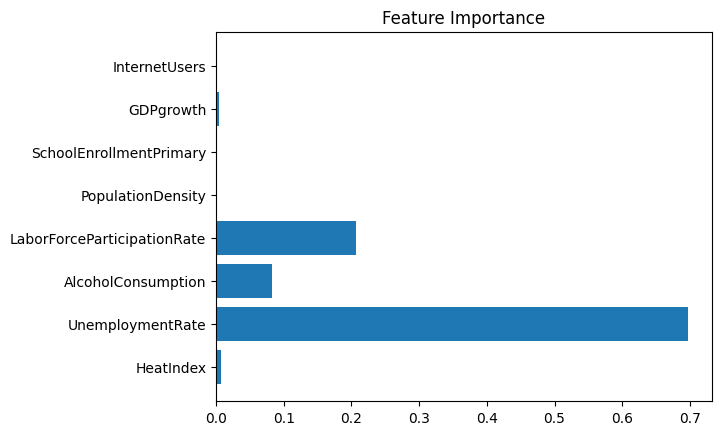

In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Step 4: Train an XGBoost Regressor
model = XGBRegressor(
    objective='reg:squarederror',  # Regression objective
    n_estimators=100,             # Number of trees
    learning_rate=0.1,            # Step size shrinkage
    max_depth=3                   # Max depth of trees
)

model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error: {rmse}")

# Optional: Feature Importance
import matplotlib.pyplot as plt
plt.barh(x.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()

In [9]:
def forecast_future(model, last_known_data, steps=10):
    """Generate future predictions iteratively."""
    future_preds = []
    input_data = last_known_data.copy()

    for _ in range(steps):
        pred = model.predict(input_data.values.reshape(1, -1))[0]
        future_preds.append(pred)

        # Shift input features and add new prediction
        input_data = input_data.shift(-1)
        input_data.iloc[-1] = pred  # Replace the last feature with the predicted value

    return np.array(future_preds)

# Get the last known row as input
last_row = x.iloc[-1, :]

# Forecast next 10 steps
future_predictions = forecast_future(model, last_row, steps=10)
print(future_predictions)

[5.4512568 4.3739014 7.425549  7.4253073 7.571339  5.169965  7.49298
 5.1433024 5.7689447 5.6238656]


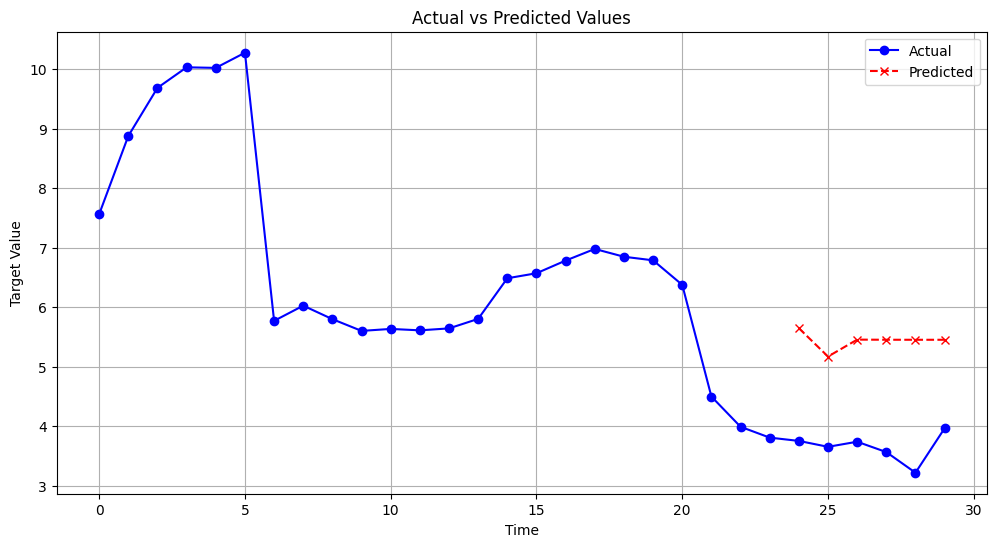

In [10]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y.index, y, label="Actual", marker='o', color='blue')

# Plot predicted values
plt.plot(y_test.index, y_pred, label="Predicted", linestyle="dashed", marker='x', color='red')

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [12]:
import statsmodels.api as sm

In [20]:
data = pd.read_csv('DataF.csv')
data.head()

,Year,IntentionalHomicidesRate,AlcoholConsumption,HeatIndex,GDPgrowth,HeatingDegre Days,InternetUsers,LaborForceParticipationRate,PopulationDensity,SchoolEnrollmentPrimary,UnemploymentRate
0,1980,7.254323,0.670,13.40,5.846027,0.00,0.0,65.253,238.297640,119.281517,15.69
1,1981,8.263114,0.560,5.29,5.699525,0.04,0.0,65.253,242.368330,122.501320,15.69
2,1982,9.325140,0.778,4.38,4.141496,0.01,0.0,65.253,246.192840,122.830040,15.69
3,1983,10.563145,0.990,17.50,4.813991,0.05,0.0,65.253,249.696093,122.421852,15.69
4,1984,9.632510,0.944,3.34,5.099147,0.00,0.0,65.253,253.110780,122.966499,15.69


In [27]:
xx = data.drop('IntentionalHomicidesRate', axis=1)  # Predictor variables
yy = data['IntentionalHomicidesRate']

In [28]:
xx = sm.add_constant(xx)

# Fit the OLS model
model = sm.OLS(yy, xx).fit()

# Print the results
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.850
Model:                                  OLS   Adj. R-squared:                  0.805
Method:                       Least Squares   F-statistic:                     18.73
Date:                      Thu, 23 Jan 2025   Prob (F-statistic):           7.27e-11
Time:                              18:42:43   Log-Likelihood:                -64.470
No. Observations:                        44   AIC:                             150.9
Df Residuals:                            33   BIC:                             170.6
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [29]:
import statsmodels.api as sm
import itertools
def stepwise_aic(X, y):
    """
    Perform stepwise AIC-based model selection.

    Parameters:
    X (pd.DataFrame): Predictor variables.
    y (pd.Series): Dependent variable.

    Returns:
    statsmodels model object with the best AIC score.
    """
    def fit_model(X, y):
        return sm.OLS(y, sm.add_constant(X)).fit()

    initial_features = []
    best_features = []
    best_aic = float('inf')
    step = 0

    while True:
        step += 1
        changed = False
        aic_candidates = []

        # Forward Step: Test adding variables
        for feature in X.columns:
            if feature not in initial_features:
                trial_features = initial_features + [feature]
                model = fit_model(X[trial_features], y)
                aic_candidates.append((model.aic, feature, 'add'))

        # Backward Step: Test removing variables
        for feature in initial_features:
            trial_features = [f for f in initial_features if f != feature]
            if trial_features:
                model = fit_model(X[trial_features], y)
                aic_candidates.append((model.aic, feature, 'remove'))

        # Find best candidate
        if aic_candidates:
            best_candidate = min(aic_candidates, key=lambda x: x[0])

            if best_candidate[0] < best_aic:
                best_aic = best_candidate[0]
                if best_candidate[2] == 'add':
                    initial_features.append(best_candidate[1])
                elif best_candidate[2] == 'remove':
                    initial_features.remove(best_candidate[1])
                changed = True

        if not changed:
            break

    # Fit final model
    best_model = fit_model(X[initial_features], y)
    return best_model


In [30]:
best_model = stepwise_aic(x, y)

# Summary of the best model
print(best_model.summary())

                               OLS Regression Results                               
Dep. Variable:     IntentionalHomicidesRate   R-squared:                       0.839
Model:                                  OLS   Adj. R-squared:                  0.818
Method:                       Least Squares   F-statistic:                     39.64
Date:                      Thu, 23 Jan 2025   Prob (F-statistic):           4.49e-14
Time:                              18:42:54   Log-Likelihood:                -66.047
No. Observations:                        44   AIC:                             144.1
Df Residuals:                            38   BIC:                             154.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------